In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
businesses = [
    # Dubai-style cake businesses (trend / pistachio-kunafa / “Dubai chocolate”)
    {
        "business": "Dubai-style Cake Shop (Example A)",
        "segment": "Dubai-style cakes",
        "menu_focus": "Dubai chocolate cake, pistachio/kunafa cakes, premium slices",
        "customer_demographics": "18–40, trend/social-media buyers, gifting, celebrations",
        "channel_mix": "Delivery + online ordering + occasional in-store",
        "avg_order_value_gbp": 28.0,      # edit this
        "weekly_orders": 300,             # edit this
        "gross_margin": 0.62,             # edit this (0.50–0.70 typical range)
        "weekly_overheads_gbp": 3500      # edit this (rent, staff, utilities, ads)
    },
    {
        "business": "Dubai-style Bakery (Example B)",
        "segment": "Dubai-style cakes",
        "menu_focus": "Kunafa desserts, pistachio products, premium celebration cakes",
        "customer_demographics": "20–55, families + gifting, premium/treat purchasers",
        "channel_mix": "Collection + local delivery",
        "avg_order_value_gbp": 40.0,
        "weekly_orders": 140,
        "gross_margin": 0.58,
        "weekly_overheads_gbp": 2200
    },

    # Mainstream UK bakery models (high volume, everyday items)
    {
        "business": "Mainstream UK Bakery (Example C)",
        "segment": "Mainstream bakeries",
        "menu_focus": "Pastries, sandwiches, sausage rolls, doughnuts, bread",
        "customer_demographics": "16–65, mass market, commuters, value seekers",
        "channel_mix": "Mostly in-store; some click & collect/delivery",
        "avg_order_value_gbp": 5.00,
        "weekly_orders": 12000,
        "gross_margin": 0.50,
        "weekly_overheads_gbp": 9000
    },
    {
        "business": "Upmarket UK Bakery (Example D)",
        "segment": "Mainstream bakeries",
        "menu_focus": "Artisan bread, pastries, cakes, coffee-led",
        "customer_demographics": "25–60, higher-income neighbourhoods, coffee regulars",
        "channel_mix": "In-store + light local delivery",
        "avg_order_value_gbp": 8.00,
        "weekly_orders": 8000,
        "gross_margin": 0.58,
        "weekly_overheads_gbp": 11000
    }
]

df = pd.DataFrame(businesses)
df


,business,segment,menu_focus,customer_demographics,channel_mix,avg_order_value_gbp,weekly_orders,gross_margin,weekly_overheads_gbp
0,Dubai-style Cake Shop (Example A),Dubai-style cakes,"Dubai chocolate cake, pistachio/kunafa cakes, ...","18–40, trend/social-media buyers, gifting, cel...",Delivery + online ordering + occasional in-store,28.0,300,0.62,3500
1,Dubai-style Bakery (Example B),Dubai-style cakes,"Kunafa desserts, pistachio products, premium c...","20–55, families + gifting, premium/treat purch...",Collection + local delivery,40.0,140,0.58,2200
2,Mainstream UK Bakery (Example C),Mainstream bakeries,"Pastries, sandwiches, sausage rolls, doughnuts...","16–65, mass market, commuters, value seekers",Mostly in-store; some click & collect/delivery,5.0,12000,0.50,9000
3,Upmarket UK Bakery (Example D),Mainstream bakeries,"Artisan bread, pastries, cakes, coffee-led","25–60, higher-income neighbourhoods, coffee re...",In-store + light local delivery,8.0,8000,0.58,11000


In [3]:
df["weekly_revenue_gbp"] = df["avg_order_value_gbp"] * df["weekly_orders"]
df["weekly_cogs_gbp"] = df["weekly_revenue_gbp"] * (1 - df["gross_margin"])
df["weekly_gross_profit_gbp"] = df["weekly_revenue_gbp"] - df["weekly_cogs_gbp"]
df["weekly_net_profit_gbp"] = df["weekly_gross_profit_gbp"] - df["weekly_overheads_gbp"]

df["yearly_revenue_gbp"] = df["weekly_revenue_gbp"] * 52
df["yearly_net_profit_gbp"] = df["weekly_net_profit_gbp"] * 52

df[[
    "business","segment",
    "weekly_revenue_gbp","weekly_net_profit_gbp",
    "yearly_revenue_gbp","yearly_net_profit_gbp"
]].sort_values("weekly_net_profit_gbp", ascending=False)


,business,segment,weekly_revenue_gbp,weekly_net_profit_gbp,yearly_revenue_gbp,yearly_net_profit_gbp
3,Upmarket UK Bakery (Example D),Mainstream bakeries,64000.0,26120.0,3328000.0,1358240.0
2,Mainstream UK Bakery (Example C),Mainstream bakeries,60000.0,21000.0,3120000.0,1092000.0
0,Dubai-style Cake Shop (Example A),Dubai-style cakes,8400.0,1708.0,436800.0,88816.0
1,Dubai-style Bakery (Example B),Dubai-style cakes,5600.0,1048.0,291200.0,54496.0


In [4]:
segment_summary = (
    df.groupby("segment", as_index=False)
      .agg(
          businesses=("business","count"),
          weekly_revenue=("weekly_revenue_gbp","sum"),
          weekly_net_profit=("weekly_net_profit_gbp","sum"),
          avg_order_value=("avg_order_value_gbp","mean"),
          avg_gross_margin=("gross_margin","mean")
      )
)
segment_summary


,segment,businesses,weekly_revenue,weekly_net_profit,avg_order_value,avg_gross_margin
0,Dubai-style cakes,2,14000.0,2756.0,34.0,0.60
1,Mainstream bakeries,2,124000.0,47120.0,6.5,0.54


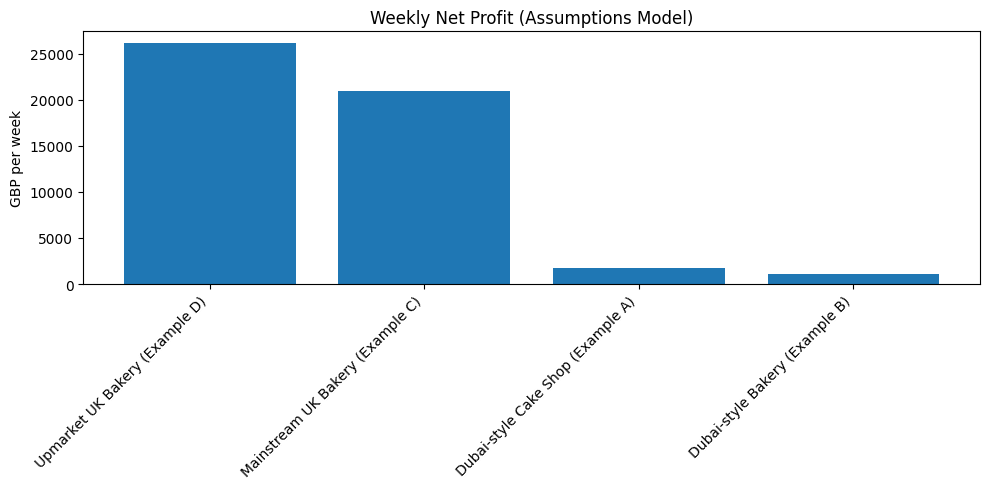

In [5]:
sorted_df = df.sort_values("weekly_net_profit_gbp", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(sorted_df["business"], sorted_df["weekly_net_profit_gbp"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("GBP per week")
plt.title("Weekly Net Profit (Assumptions Model)")
plt.tight_layout()
plt.show()


In [6]:
df[[
    "business","segment","menu_focus","channel_mix","customer_demographics",
    "avg_order_value_gbp","weekly_orders","gross_margin","weekly_overheads_gbp"
]].sort_values(["segment","avg_order_value_gbp"], ascending=[True, False])


,business,segment,menu_focus,channel_mix,customer_demographics,avg_order_value_gbp,weekly_orders,gross_margin,weekly_overheads_gbp
1,Dubai-style Bakery (Example B),Dubai-style cakes,"Kunafa desserts, pistachio products, premium c...",Collection + local delivery,"20–55, families + gifting, premium/treat purch...",40.0,140,0.58,2200
0,Dubai-style Cake Shop (Example A),Dubai-style cakes,"Dubai chocolate cake, pistachio/kunafa cakes, ...",Delivery + online ordering + occasional in-store,"18–40, trend/social-media buyers, gifting, cel...",28.0,300,0.62,3500
3,Upmarket UK Bakery (Example D),Mainstream bakeries,"Artisan bread, pastries, cakes, coffee-led",In-store + light local delivery,"25–60, higher-income neighbourhoods, coffee re...",8.0,8000,0.58,11000
2,Mainstream UK Bakery (Example C),Mainstream bakeries,"Pastries, sandwiches, sausage rolls, doughnuts...",Mostly in-store; some click & collect/delivery,"16–65, mass market, commuters, value seekers",5.0,12000,0.50,9000


In [7]:
# Example store counts (EDIT THESE)
# If one business is a single shop, store_count = 1
df["store_count"] = [1, 1, 2500, 150]  # <- change these to realistic numbers you want

df["uk_weekly_net_profit_gbp"] = df["weekly_net_profit_gbp"] * df["store_count"]
df["uk_yearly_net_profit_gbp"] = df["yearly_net_profit_gbp"] * df["store_count"]

df[[
    "business","segment","store_count",
    "uk_weekly_net_profit_gbp","uk_yearly_net_profit_gbp"
]].sort_values("uk_yearly_net_profit_gbp", ascending=False)


,business,segment,store_count,uk_weekly_net_profit_gbp,uk_yearly_net_profit_gbp
2,Mainstream UK Bakery (Example C),Mainstream bakeries,2500,52500000.0,2.730000e+09
3,Upmarket UK Bakery (Example D),Mainstream bakeries,150,3918000.0,2.037360e+08
0,Dubai-style Cake Shop (Example A),Dubai-style cakes,1,1708.0,8.881600e+04
1,Dubai-style Bakery (Example B),Dubai-style cakes,1,1048.0,5.449600e+04
